### Neural network Implementation

In [4]:
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [77]:
NB_EPOCH = 30
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10

OPTIMIZER = Adam() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.1

DROPOUT = 0.2
RESHAPED = 784

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_test.shape,y_train.shape)

(10000, 28, 28) (60000,)


In [27]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [28]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)


#### Simple architecture

In [34]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('sigmoid'))


model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s - loss: 0.7236 - acc: 0.8344 - val_loss: 0.3250 - val_acc: 0.9177
Epoch 2/30
54000/54000 [==============================] - 1s - loss: 0.3543 - acc: 0.9036 - val_loss: 0.2690 - val_acc: 0.9282
Epoch 3/30
54000/54000 [==============================] - 0s - loss: 0.3162 - acc: 0.9126 - val_loss: 0.2508 - val_acc: 0.9323
Epoch 4/30
54000/54000 [==============================] - 0s - loss: 0.2997 - acc: 0.9168 - val_loss: 0.2419 - val_acc: 0.9353
Epoch 5/30
54000/54000 [==============================] - 0s - loss: 0.2900 - acc: 0.9197 - val_loss: 0.2356 - val_acc: 0.9355
Epoch 6/30
54000/54000 [==============================] - 0s - loss: 0.2831 - acc: 0.9214 - val_loss: 0.2327 - val_acc: 0.9363
Epoch 7/30
54000/54000 [==============================] - 0s - loss: 0.2782 - acc: 0.9226 - val_loss: 0.2292 - val_acc: 0.9367
Epoch 8/30
54000/54000 [==============================] - 0s -

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [36]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

 7808/10000 [======================>.......] - ETA: 0sTest accuracy: 0.9276


#### hidden layer added

In [61]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s - loss: 0.3441 - acc: 0.9020 - val_loss: 0.1421 - val_acc: 0.9555
Epoch 2/30
54000/54000 [==============================] - 1s - loss: 0.1395 - acc: 0.9579 - val_loss: 0.1112 - val_acc: 0.9678
Epoch 3/30
54000/54000 [==============================] - 1s - loss: 0.0931 - acc: 0.9715 - val_loss: 0.0946 - val_acc: 0.9697
Epoch 4/30
54000/54000 [==============================] - 1s - loss: 0.0707 - acc: 0.9786 - val_loss: 0.0869 - val_acc: 0.9745
Epoch 5/30
54000/54000 [==============================] - 1s - loss: 0.0554 - acc: 0.9828 - val_loss: 0.0813 - val_acc: 0.9748
Epoch 6/30
54000/54000 [==============================] - 1s - loss: 0.0441 - acc: 0.9861 - val_loss: 0.0787 - val_acc: 0.9778
Epoch 7/30
54000/54000 [==============================] - 1s - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0847 - val_acc: 0.9775
Epoch 8/30
54000/54000 [==============================] - 1s -

In [62]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_23 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_24 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [63]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

 9504/10000 [===========================>..] - ETA: 0sTest accuracy: 0.9766


#### Dropouts added

In [78]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s - loss: 0.4900 - acc: 0.8453 - val_loss: 0.1329 - val_acc: 0.9613
Epoch 2/30
54000/54000 [==============================] - 2s - loss: 0.2021 - acc: 0.9409 - val_loss: 0.0996 - val_acc: 0.9717
Epoch 3/30
54000/54000 [==============================] - 2s - loss: 0.1558 - acc: 0.9541 - val_loss: 0.0898 - val_acc: 0.9733
Epoch 4/30
54000/54000 [==============================] - 2s - loss: 0.1302 - acc: 0.9611 - val_loss: 0.0814 - val_acc: 0.9748
Epoch 5/30
54000/54000 [==============================] - 2s - loss: 0.1101 - acc: 0.9679 - val_loss: 0.0799 - val_acc: 0.9778
Epoch 6/30
54000/54000 [==============================] - 2s - loss: 0.1007 - acc: 0.9703 - val_loss: 0.0744 - val_acc: 0.9762
Epoch 7/30
54000/54000 [==============================] - 2s - loss: 0.0908 - acc: 0.9731 - val_loss: 0.0710 - val_acc: 0.9792
Epoch 8/30
54000/54000 [==============================] - 2s -

In [79]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_38 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
__________

In [80]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print('Test accuracy:', score[1])

 9696/10000 [============================>.] - ETA: 0sTest accuracy: 0.9813


#### Loss and accuracy graph

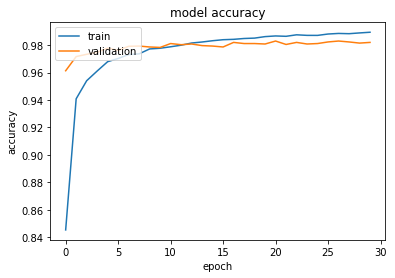

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


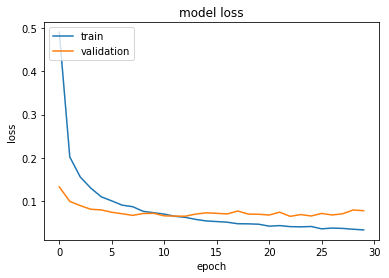

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [83]:
import cv2

In [88]:
image = cv2.imread("/home/sharma/git-hub/image-classification-keras/examples/santa_01.png",1)

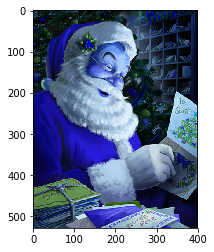

In [97]:
plt.imshow(image)
plt.show()

In [93]:
cvtImage  = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

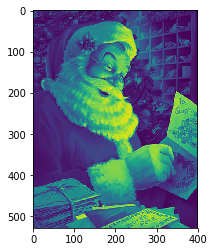

In [94]:
plt.imshow(cvtImage)

In [99]:
cv2.imshow("Santa",image)
cv2.waitKey()
cv2.destroyAllWindows()


error: /io/opencv/modules/highgui/src/window.cpp:583: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


In [104]:
resized = cv2.resize(image,(120,120))

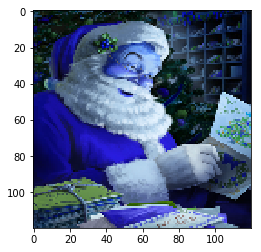

In [105]:
plt.imshow(resized)